# Predicting Mental Fitness using machine learning

this project looks into using various python based machine learning tools and data science libraries in an attempt to buid a machine learning model capable of tracking the users mental fitness.

In [1]:
#preparing the tools

# we are going to use pandas,matplotlib and numpy for data ananlysis and manipulation.

In [2]:
# importing all the tools we need

#importing Data analysis and Manipulation Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# models from Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

## Load Data

In [3]:
data=pd.read_csv("prevalence-by-mental-and-substance-use-disorder _AI.csv")

In [4]:
data.drop("Code", axis=1, inplace=True)

In [5]:
data.columns = ['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 'Anxiety', 'Drug_usage', 'Depression', 'Alcohol', 'Mental_fitness']
data

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


In [6]:
data.isna().sum()

Country             0
Year                0
Schizophrenia       0
Bipolar_disorder    0
Eating_disorders    0
Anxiety             0
Drug_usage          0
Depression          0
Alcohol             0
Mental_fitness      0
dtype: int64

In [7]:
data.describe()

,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,0.281167,0.673891,0.211062,4.327525,0.746708,3.950449,1.578807,4.818062
std,8.656074,0.047561,0.258594,0.152559,1.177961,0.463026,0.921021,0.934655,2.294029
min,1990.000000,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900,0.215647
25%,1997.000000,0.255468,0.539791,0.099857,3.567064,0.423502,3.258977,0.732826,3.006507
50%,2004.500000,0.287456,0.591893,0.154143,4.094443,0.646050,3.904117,1.460045,4.679177
75%,2012.000000,0.304760,0.897248,0.276891,4.797286,0.890013,4.550505,2.261262,6.387488
max,2019.000000,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694,13.761517


In [8]:
l=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=l.fit_transform(data[i])
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   int32  
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorders  6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 507.8 KB


,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,0,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,0,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,0,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,0,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,0,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,227,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,227,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,227,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,227,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


# Data Visualization

[]

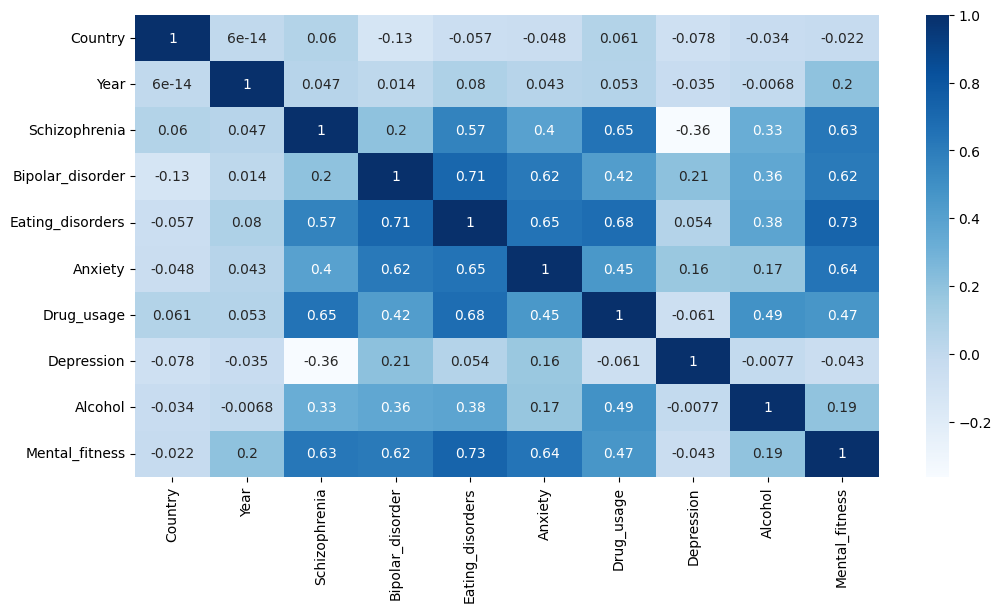

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

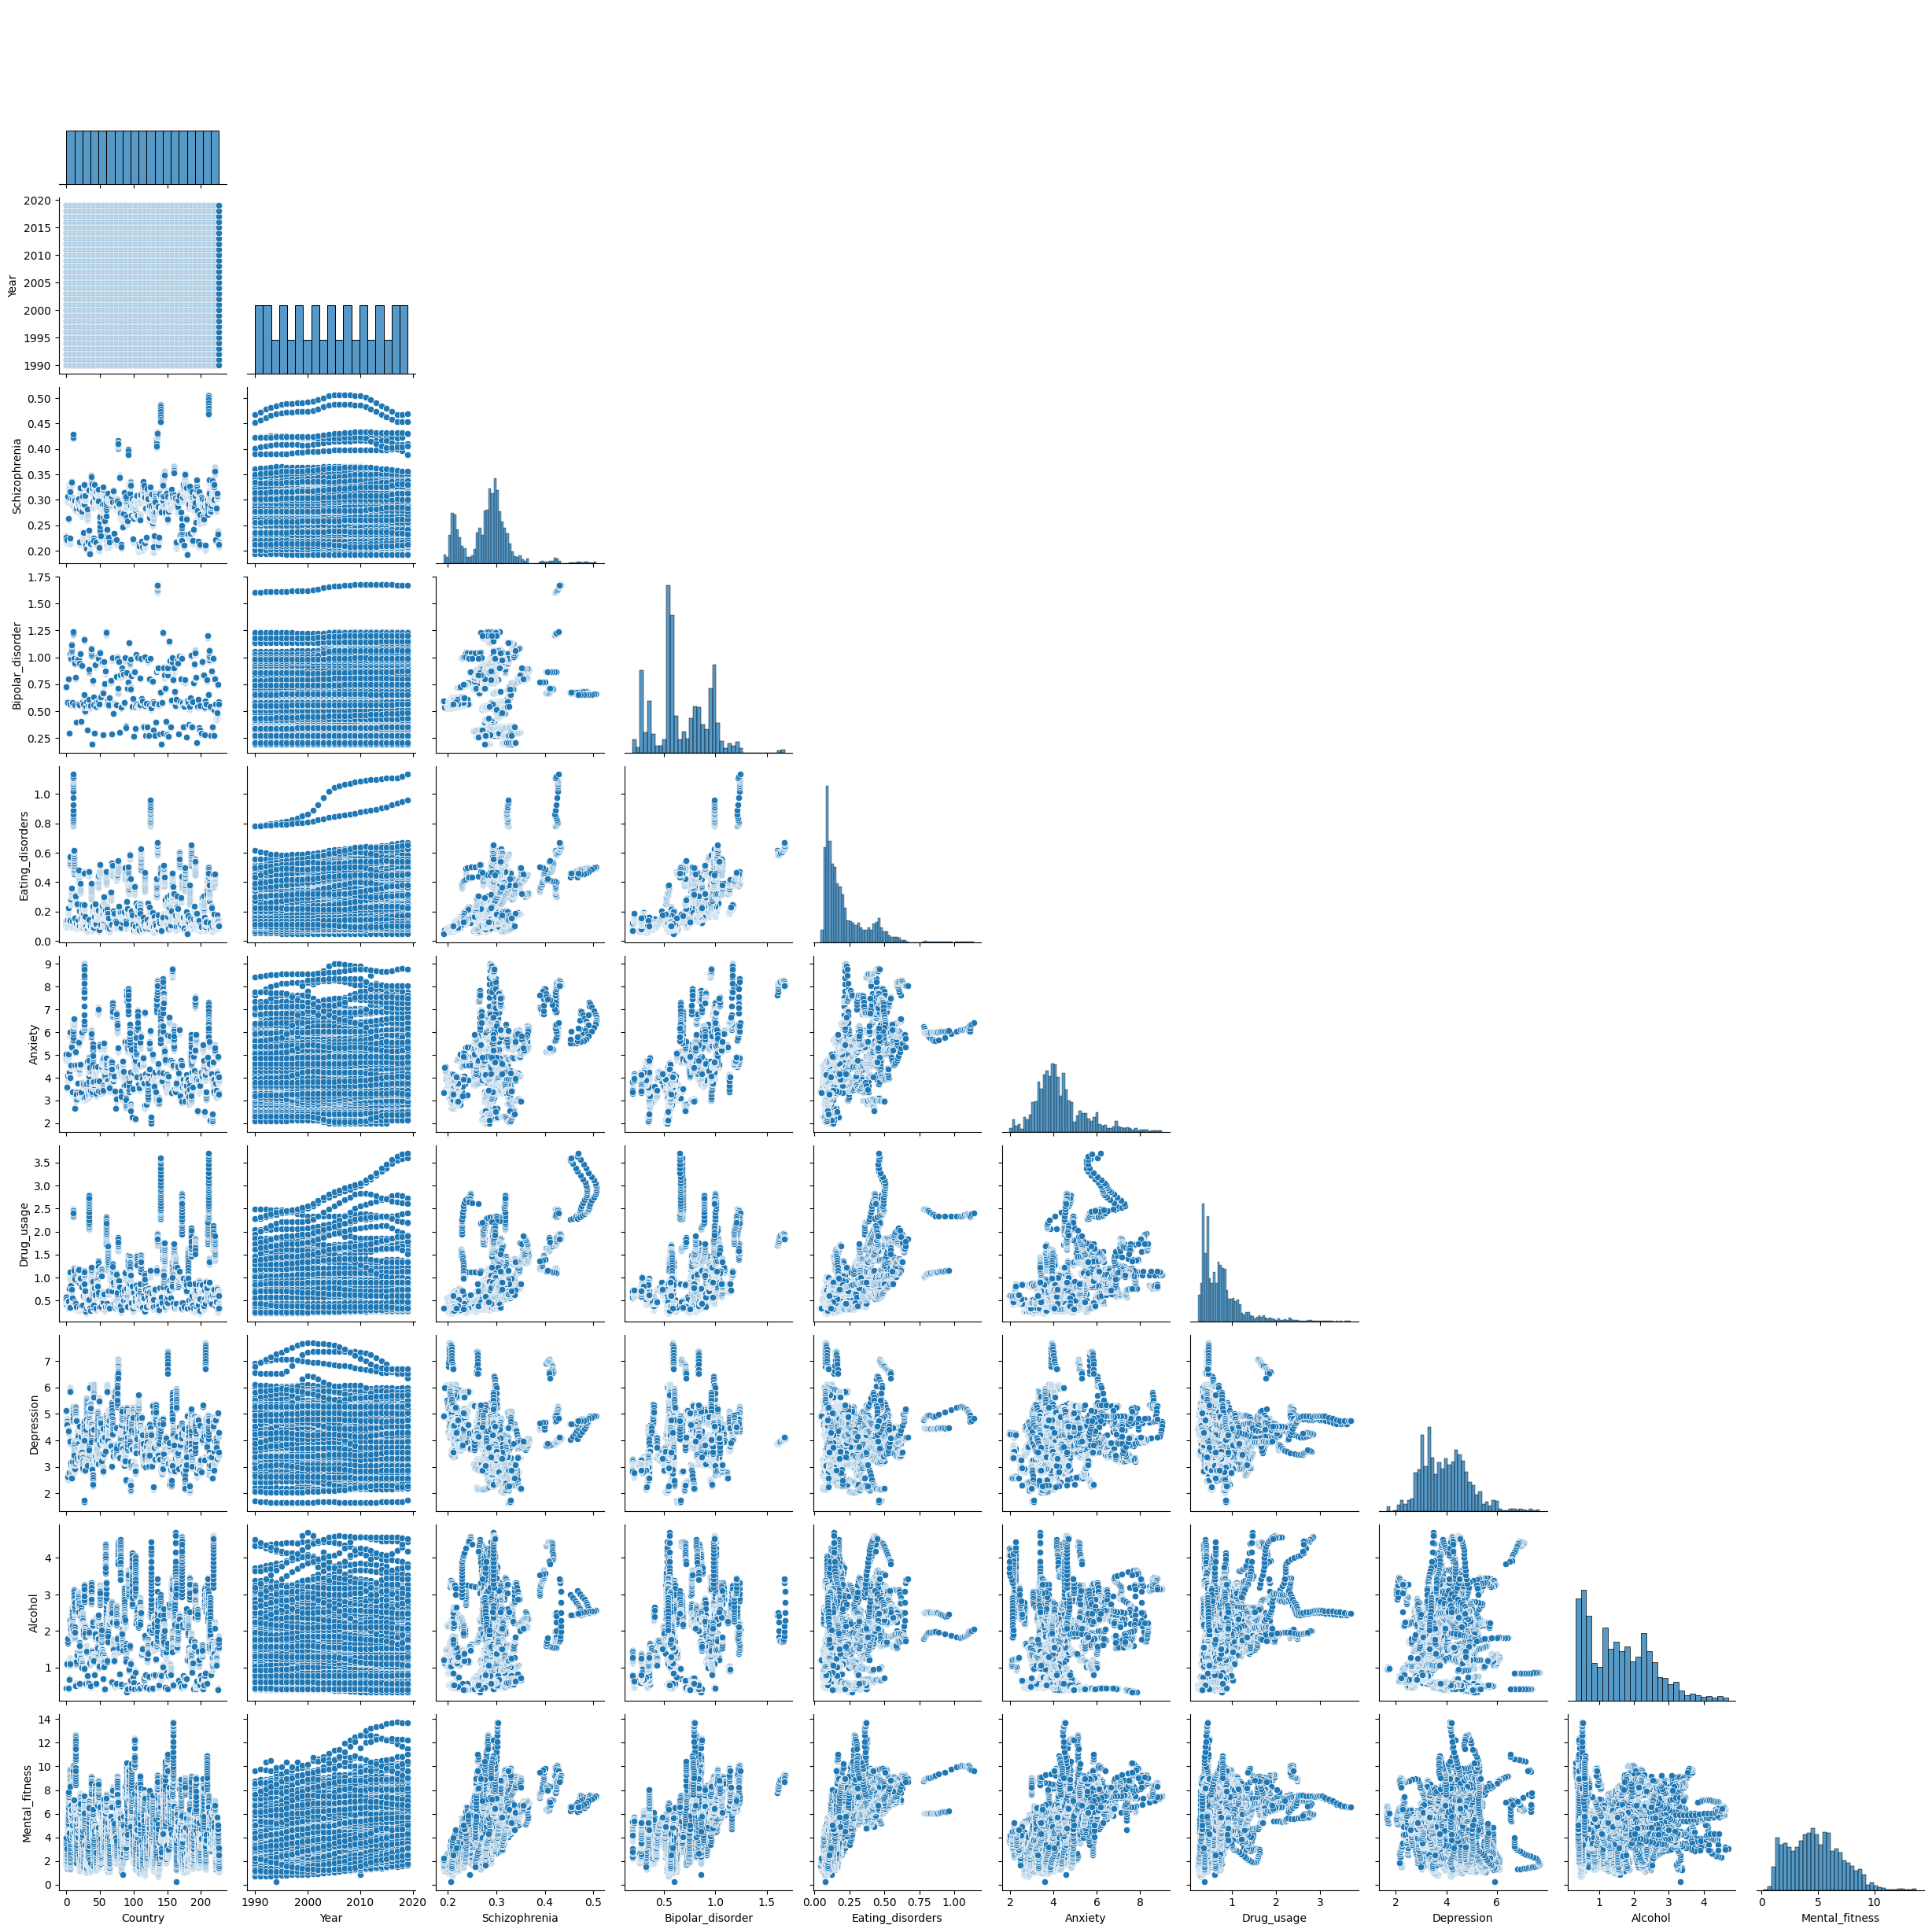

In [10]:
sns.pairplot(data,corner=True)
plt.show()

In [11]:
mean=data['Mental_fitness'].mean()
mean

4.818061811758918

In [12]:
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   int32  
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorders  6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 507.8 KB


In [13]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=l.fit_transform(df[i])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   int32  
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorders  6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 507.8 KB


,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,0,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,0,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,0,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,0,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,0,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,227,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,227,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,227,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,227,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


# Split Data

In [14]:
x=df.drop('Mental_fitness',axis=1)
# here i split the data into two data where,
# x contains input varibles or features,
# y contains the taget variable.

y=df['Mental_fitness']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.20, random_state=2)
# here, xtrain represents the input variables or features of the training data
# here, ytrain represents the target variables of the training data
# here, xtest represents the input variables or features of the testing data
# here, ytest represents the target variables of the testing data


In [15]:
print("xtrain:", xtrain.shape)
print("xtest:", xtest.shape)
print("ytrain:", ytrain.shape)
print("ytest:", ytest.shape)

xtrain: (5472, 9)
xtest: (1368, 9)
ytrain: (5472,)
ytest: (1368,)


#  Model Training

In [16]:
lr=LinearRegression()

# here this line fits the Linear Regression model to the training data.
lr.fit(xtrain,ytrain)

# ytrain_pred will predict on the training data 
ytrain_pred = lr.predict(xtrain)

# mse gives us an idea of how close the predicted values are to the true values
mse = mean_squared_error(ytrain, ytrain_pred)

# rmse provides us the average magintude of the predicted errors in the same units as the target variable.
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))

# r2_score gives us a number beteween 0 and 1, with 1 indicating perfect fit and 0 indicating worst fit.
r2 = r2_score(ytrain, ytrain_pred)

print("The Linear Regression model performance for training set:")
print("MSE is:", mse)
print("RMSE is:", rmse)
print("R2 score is:", r2)

The Linear Regression model performance for training set:
MSE is: 1.3899593726347022
RMSE is: 1.178965382288514
R2 score is: 0.7413245789600416


In [17]:
# now i will use a different algorithm to train the model and evaluate it.
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

# ytrain_pred will predict on the training data 
ytrain_pred = rf.predict(xtrain)

# mse gives us an idea of how close the predicted values are to the true values
mse = mean_squared_error(ytrain, ytrain_pred)

# rmse provides us the average magintude of the predicted errors in the same units as the target variable.
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))

# r2_score gives us a number beteween 0 and 1, with 1 indicating perfect fit and 0 indicating worst fit.
r2 = r2_score(ytrain, ytrain_pred)

print("The Random Forest Regression model performance for training set:")
print("MSE is:", mse)
print("RMSE is:", rmse)
print("R2 score is:", r2)

The Random Forest Regression model performance for training set:
MSE is: 0.005241718557135365
RMSE is: 0.0723997137918056
R2 score is: 0.9990245011606563


In [22]:
# as we can see that the r2 score of the RandomForestRegressor is closest to 1.
# so this algorithm is best fit for our model.
# now that we have our best algorithm for our model,
# we are going to use that algorithm to predict for our test dataset.

ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The Linear Regression model performance for testing set:")
print("MSE is:", mse)
print("RMSE is:", rmse)
print("R2 score is:", r2)

# Random Forest Regression
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print()

print("The Random Forest Regression model performance for testing set:")
print("MSE is:", mse)
print("RMSE is:", rmse)
print("R2 score is:", r2)



The Linear Regression model performance for testing set:
MSE is: 1.1357545316965034
RMSE is: 1.0657178480707281
R2 score is: 0.7638974087530465

The Random Forest Regression model performance for testing set:
MSE is: 0.030105647467778045
RMSE is: 0.17350979069717665
R2 score is: 0.993741586601735


In [ ]:
# From the above results we can see that Random Forest Regression algorithm Works best for our problem and it has as high as 99% accuracy.
# Now that our model is ready, we are going to take user input about our users medical attributes and predict their mental fitness.

print("Mental Fitness Tracker")
country = input("Enter your Country name:")
year = int(input("Enter the year:"))
Schizophrenia = float(input("Enter your Schizophrenia rate in %:"))
Bipolar_disorder = float(input("Enter your Bipolar disorder in %:"))
Eating_disorders = float(input("Enter your Eating Disorder in %:"))
Anxiety = float(input("Enter your Anxiety rate in %:"))
Drug_usage = float(input("Enter your Drug_usage rate in %:"))
Depression = float(input("Enter your Depression rate in %:"))
Alcohol = float(input("Enter your Alchhol intake rate in %:"))

prediction = rf.predict([['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorders','Anxiety','Drug_usage','Depression','Alcohol']])
print("Your Mental Fitness is:", prediction*100)
